# Regression with ML: Mercari Price Prediction

## Goal
To find best price for each second-hand products which users uplod on mercari   
## 1. Data Preparation

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
submission = pd.read_csv("sample_submission.csv")
submission.head()

,test_id,price
0,0,26.738
1,1,26.738
2,2,26.738
3,3,26.738
4,4,26.738


In [10]:
mercari = pd.read_csv("train.tsv", delimiter="\t")
mercari.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [4]:
mercari_test = pd.read_csv("test.tsv", delimiter="\t")
mercari_test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


## 2. Target and Feature Split

In [11]:
mercari_price = mercari["price"]
mercari_price.head()

0    10.0
1    52.0
2    10.0
3    35.0
4    44.0
Name: price, dtype: float64

In [12]:
mercari_price.shape

(1482535,)

In [7]:
mercari_price.drop(labels=[511535, 861230, 1224924, 1264242], inplace=True)
mercari_price.reset_index(drop=True, inplace=True)
mercari_price.shape

(1482531,)

In [13]:
mercari.drop(["price", "train_id"], axis=1, inplace=True)
mercari.head()

,name,item_condition_id,category_name,brand_name,shipping,item_description
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,0,Complete with certificate of authenticity


In [14]:
mercari.shape

(1482535, 6)

## 3. Convert Data Type

In [15]:
mercari.dtypes

name                 object
item_condition_id     int64
category_name        object
brand_name           object
shipping              int64
item_description     object
dtype: object

In [16]:
len(mercari["brand_name"].unique())

4810

## 4. Missing Value

In [17]:
mercari.isnull().any()

name                 False
item_condition_id    False
category_name         True
brand_name            True
shipping             False
item_description      True
dtype: bool

In [18]:
mercari.isnull().sum()

name                      0
item_condition_id         0
category_name          6327
brand_name           632682
shipping                  0
item_description          4
dtype: int64

I will cut 4 records which have null value in column "item_description".

In [19]:
mercari[mercari["item_description"].isnull()]

,name,item_condition_id,category_name,brand_name,shipping,item_description
511535,Shoes for Michelle,4,Kids/Girls 0-24 Mos/Shoes,NaN,0,NaN
861230,Lipgloss,4,Beauty/Makeup/Lips,NaN,0,NaN
1224924,Disney Minnie Head band,3,Women/Women's Accessories/Hair Accessories,Disney,0,NaN
1264242,For Bianca,3,Women/Women's Accessories/Scarves & Wraps,NaN,1,NaN


In [20]:
mercari.drop(labels=[511535, 861230, 1224924, 1264242], inplace=True)
mercari.shape

(1482531, 6)

In [21]:
mercari["brand_name"].fillna(value="no_brand", inplace=True)

In [22]:
mercari["category_name"].fillna(value="no_category", inplace=True)

In [23]:
mercari.isnull().sum()

name                 0
item_condition_id    0
category_name        0
brand_name           0
shipping             0
item_description     0
dtype: int64

# Policy for each Features
1. Sequencial  Category Data
    - item_condition_id -> MultiLabelEncode
    
    
2. Discrete Category Data
    - shipping -> Binary
    - category_name -> Multiple-One-Hot
    - brand_name -> One-Hot
    
      
3. NLP Data
    - name
    - item_description

## 5. Numerical Values: Outlier Exclusion

In [19]:
mercari_target = pd.DataFrame(mercari_price)
mercari_target.head()

,price
0,10.0
1,52.0
2,10.0
3,35.0
4,44.0


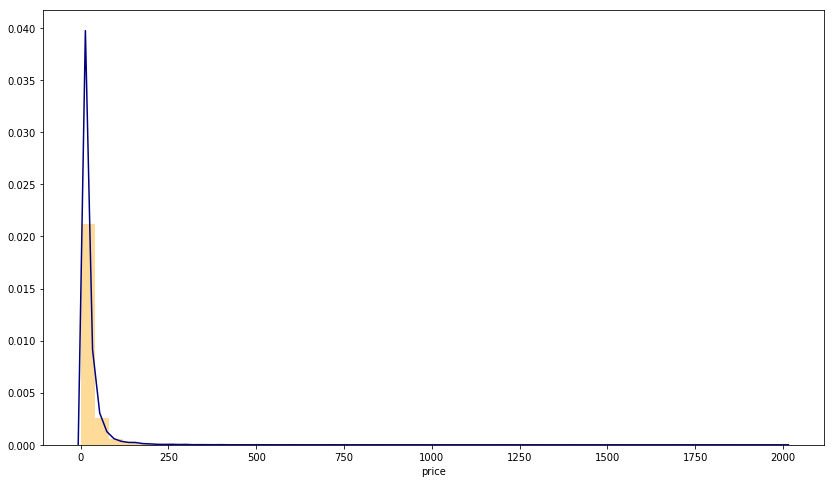

In [22]:
plt.figure(figsize=(14,8))
sns.distplot(mercari_price, hist_kws={"color": "Orange"}, kde_kws={"color": "Navy"})
plt.show();

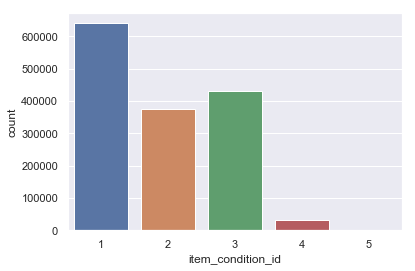

In [23]:
# the condition of the items provided by the seller
sns.set(style="darkgrid")
ax = sns.countplot(x="item_condition_id", data=mercari)

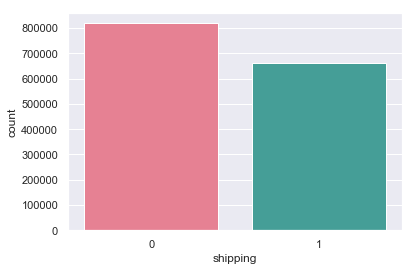

In [24]:
# 1 if shipping fee is paid by seller and 0 by buyer
ax = sns.countplot(x="shipping", data=mercari, palette="husl")

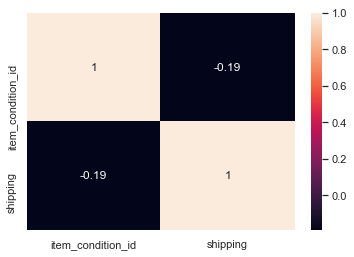

In [25]:
# correlation with above 2 features
numeric_category = ["item_condition_id", "shipping"]
cor = mercari[numeric_category].corr()
sns.heatmap(cor, annot=True)

### column "category_name" 1 to 5

In [26]:
max_length = 3
counter = 0
greater_index_lists = []

for category_text in mercari["category_name"]:
    if category_text == "no_category":
        counter += 1
        continue
    else:
        category_list = category_text.split("/")        
        if len(category_list) > 3:
            greater_index_lists.append(counter) 
            counter += 1
            if len(category_list) > max_length:
                max_length = len(category_list)
        else:
            counter += 1

In [27]:
len(greater_index_lists)

4389

In [28]:
counter

1482531

In [29]:
max_length

5

In [30]:
cat1 = []
cat2 = []
cat3 = []
cat4 = []
cat5 = []
counter = 0

for category_text in mercari["category_name"]:
    
    if category_text == "no_category":
        cat1.append(np.nan)
        cat2.append(np.nan)
        cat3.append(np.nan)
        cat4.append(np.nan)
        cat5.append(np.nan)
        counter += 1
    else:
        category_list = category_text.split("/")
        
        if len(category_list) == 3:
            cat1.append(category_list[0])
            cat2.append(category_list[1])
            cat3.append(category_list[2])
            cat4.append(np.nan)
            cat5.append(np.nan)
            counter += 1
        elif len(category_list) == 4:
            cat1.append(category_list[0])
            cat2.append(category_list[1])
            cat3.append(category_list[2])
            cat4.append(category_list[3])
            cat5.append(np.nan)
            counter += 1       
        elif len(category_list) == 5:
            cat1.append(category_list[0])
            cat2.append(category_list[1])
            cat3.append(category_list[2])
            cat4.append(category_list[3])
            cat5.append(category_list[4])
            counter += 1
        else:
            print("error")
            break
            
new_category = pd.DataFrame({"category_A": cat1, "category_B": cat2, "category_C": cat3, "category_D": cat4, "category_E": cat5})
#len(new_category)
counter

1482531

In [31]:
new_category.shape

(1482531, 5)

In [ ]:
mercari.drop("category_name", axis=1, inplace=True)

In [ ]:
mercari.shape

(1482531, 5)

In [ ]:
mercari.reset_index(drop=True, inplace=True)

In [ ]:
mercari_cat = pd.concat([mercari, new_category], axis=1)
mercari_cat.shape

(1482531, 10)

In [ ]:
mercari_cat.head()

,name,item_condition_id,brand_name,shipping,item_description,category_A,category_B,category_C,category_D,category_E
0,MLB Cincinnati Reds T Shirt Size XL,3,no_brand,1,No description yet,Men,Tops,T-shirts,NaN,NaN
1,Razer BlackWidow Chroma Keyboard,3,Razer,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,NaN,NaN
2,AVA-VIV Blouse,1,Target,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,NaN,NaN
3,Leather Horse Statues,1,no_brand,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,NaN,NaN
4,24K GOLD plated rose,1,no_brand,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,NaN,NaN


In [ ]:
a = list(mercari_cat["category_A"].unique())
len(a)

11

In [ ]:
b = list(mercari_cat["category_B"].unique())
len(b)

114

In [ ]:
for i in range(0, len(a)):
    if a[i] in b:
        print("duplicates!")

duplicates!
duplicates!
duplicates!


In [ ]:
df_A = pd.concat([mercari_cat["category_A"], mercari_price], axis=1)
df_A.head()

,category_A,price
0,Men,10.0
1,Electronics,52.0
2,Women,10.0
3,Home,35.0
4,Women,44.0


In [ ]:
df_A.shape

(1482531, 2)

In [ ]:
plt.rcParams['figure.figsize'] = (400.0, 200.0)

It looks like category_A has some relationship with Price.  

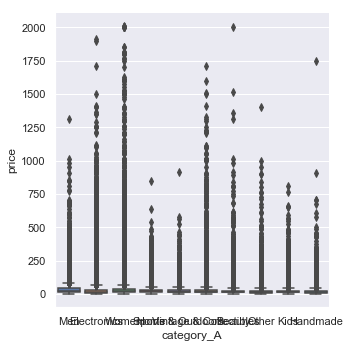

In [ ]:
# plt.figure(figsize=(2000, 800))
sns.catplot(x="category_A", y="price", kind="box", data=df_A);
plt.show();

In [ ]:
df_B = pd.concat([mercari_cat["category_B"], mercari_price], axis=1)
df_B.head()

,category_B,price
0,Tops,10.0
1,Computers & Tablets,52.0
2,Tops & Blouses,10.0
3,Home Décor,35.0
4,Jewelry,44.0


In [ ]:
plt.figure(figsize=(20, 12))
sns.catplot(x="category_B", y="price", kind="swarm", data=df_B);
plt.show();

## What I found till now about features
Slightly related with Price  
- item_condition_id
- shipping
   
Generally related with Price  
- category_name (SVD)
- brand_name ()

Not yet checked (tf-idf -> word2vec -> t-SNE)
- name
- item_description

### for "brand_name", I will use t-SNE/PCA to reduce about 5k categories to 2D/3D

In [ ]:
# count unique value
len(mercari["brand_name"].unique())

I will check the price distribution which has brand or not

In [ ]:
len(mercari["brand_name"])

In [ ]:
index_num = 0
no_brand_index = []
brand_index = []

for v in mercari["brand_name"]:
    if v == "no_brand":
        no_brand_index.append(index_num)
        index_num += 1
    else:
        brand_index.append(index_num)
        index_num += 1

print("Length of no_brand_index: ", len(no_brand_index))
print("Length of brand_index: ", len(brand_index))

In [ ]:
sns.distplot(mercari.ix[no_brand_index, "brand_name"], color="skyblue", label="No Brand")
sns.distplot(mercari.ix[brand_index, "brand_name"], color="red", label="Brand Products")
sns.plt.legend()

# Preorocessing for NLP

I will treat two features "name" and "item_description" as text data.  

#### Process
1. Concat "name" and "item_description"
2. Remove all irrelevant characters such as 24 or @
3. Tokenize your text by separating it into individual words
4. Normalize all characters to lowercase, in order to treat words such as “hello”, “Hello”, and “HELLO” the same
5. Lemmatization (reduce words such as “am”, “are”, and “is” to a common form such as “be”)
6. Remove "stopwords"
7. Bag of words: TF-IDF
8. Dimensional Reduction: t-SNE and LDA

"name" and "item_description" -> BoW -> 2D or 3D

-----------------------------

* Bag of Words: CountVectorizer & TF-IDF is scaler: from word to scale
* Word Embedding: word2vec, doc2vec, seq2seq is semantic vector

In [45]:
mercari[["name", "item_description"]].head(20)

,name,item_description
0,MLB Cincinnati Reds T Shirt Size XL,No description yet
1,Razer BlackWidow Chroma Keyboard,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,Complete with certificate of authenticity
5,Bundled items requested for Ruie,"Banana republic bottoms, Candies skirt with ma..."
6,Acacia pacific tides santorini top,Size small but straps slightly shortened to fi...
7,Girls cheer and tumbling bundle of 7,You get three pairs of Sophie cheer shorts siz...
8,Girls Nike Pro shorts,Girls Size small Plus green. Three shorts total.
9,Porcelain clown doll checker pants VTG,I realized his pants are on backwards after th...


In [50]:
mercari[["name", "item_description"]].isnull().sum()

name                0
item_description    0
dtype: int64

In description, some data have "No description yet". I will remove this as stopword before.

In [38]:
no_desc = mercari[mercari["item_description"]=="No description yet"].index

In [39]:
type(no_desc)

pandas.core.indexes.numeric.Int64Index

In [40]:
len(no_desc)

82489

In [46]:
no_desc_list = list(no_desc)

In [47]:
mercari.iloc[no_desc_list, "item_description"] = np.nan

/Users/akr712/.pyenv/versions/jupyter3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [49]:
mercari["item_description"].fillna("", inplace=True)

In [51]:
mercari[["name", "item_description"]].head(20)

,name,item_description
0,MLB Cincinnati Reds T Shirt Size XL,
1,Razer BlackWidow Chroma Keyboard,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,Complete with certificate of authenticity
5,Bundled items requested for Ruie,"Banana republic bottoms, Candies skirt with ma..."
6,Acacia pacific tides santorini top,Size small but straps slightly shortened to fi...
7,Girls cheer and tumbling bundle of 7,You get three pairs of Sophie cheer shorts siz...
8,Girls Nike Pro shorts,Girls Size small Plus green. Three shorts total.
9,Porcelain clown doll checker pants VTG,I realized his pants are on backwards after th...


In [56]:
mercari_text = pd.concat([mercari["name"], mercari["item_description"]], axis=1)
mercari_text.head()

,name,item_description
0,MLB Cincinnati Reds T Shirt Size XL,
1,Razer BlackWidow Chroma Keyboard,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,Complete with certificate of authenticity


In [57]:
len(mercari_text)

1482531

In [58]:
name_list = []
desc_list = []

for name in mercari_text["name"]:
    name_list.append(name)

In [60]:
for desc in mercari_text["item_description"]:
    desc_list.append(desc)

In [59]:
len(name_list)

1482531

In [61]:
len(desc_list)

1482531

In [64]:
merge_text_list = []

for i in range(0, len(mercari_text)):
    merge_text = name_list[i] + " " + desc_list[i]
    merge_text_list.append(merge_text)
    
len(merge_text_list)

1482531

In [88]:
text_df = pd.DataFrame(merge_text_list, columns=["text"])
text_df.head()

,text
0,MLB Cincinnati Reds T Shirt Size XL
1,Razer BlackWidow Chroma Keyboard This keyboard...
2,AVA-VIV Blouse Adorable top with a hint of lac...
3,Leather Horse Statues New with tags. Leather h...
4,24K GOLD plated rose Complete with certificate...


In [68]:
len(merge_text_list)

1482531

2. Normalize all characters to lowercase, in order to treat words such as “hello”, “Hello”, and “HELLO” the same

In [90]:
text_df["text"] = text_df["text"].apply(lambda x: " ".join(x.lower() for x in x.split()))
text_df["text"].head()

0                  mlb cincinnati reds t shirt size xl
1    razer blackwidow chroma keyboard this keyboard...
2    ava-viv blouse adorable top with a hint of lac...
3    leather horse statues new with tags. leather h...
4    24k gold plated rose complete with certificate...
Name: text, dtype: object

3. Remove all irrelevant characters: numbers, mark, emoji such as 24 or @

In [89]:
import re
import string

In [91]:
text_df["text"] = text_df["text"].str.replace('[^\w\s]','')
text_df["text"].head()

0                  mlb cincinnati reds t shirt size xl
1    razer blackwidow chroma keyboard this keyboard...
2    avaviv blouse adorable top with a hint of lace...
3    leather horse statues new with tags leather ho...
4    24k gold plated rose complete with certificate...
Name: text, dtype: object

In [92]:
text_df["text"] = text_df["text"].str.replace(r"\d+", "")
text_df["text"].head()

0                  mlb cincinnati reds t shirt size xl
1    razer blackwidow chroma keyboard this keyboard...
2    avaviv blouse adorable top with a hint of lace...
3    leather horse statues new with tags leather ho...
4    k gold plated rose complete with certificate o...
Name: text, dtype: object

In [96]:
text_df["text"] = text_df["text"].str.replace(r"[︰-＠]", "")
text_df.head(10)

,text
0,mlb cincinnati reds t shirt size xl
1,razer blackwidow chroma keyboard this keyboard...
2,avaviv blouse adorable top with a hint of lace...
3,leather horse statues new with tags leather ho...
4,k gold plated rose complete with certificate o...
5,bundled items requested for ruie banana republ...
6,acacia pacific tides santorini top size small ...
7,girls cheer and tumbling bundle of you get th...
8,girls nike pro shorts girls size small plus gr...
9,porcelain clown doll checker pants vtg i reali...


4. Tokenize your text by separating it into individual words

In [98]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /Users/akr712/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
text_df["text"] = text_df["text"].apply(lambda x: word_tokenize(x))
text_df["text"].head()

5. Remove "stopwords"

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
text_df["text"] = text_df["text"].apply(lambda words: word for word in words if word not in stop_words)
text_df["text"].head()

6. Stemming and Lemmatization (reduce words such as “am”, “are”, and “is” to a common form such as “be”)

In [ ]:
# Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
text_df["text"] = text_df["text"].apply(lambda x: stemmer.stem(x))
text_df["text"].head()

In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/akr712/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
text_df["text"] = text_df["text"].apply(lambda x: lemmatizer.lemmatize(x))
text_df["text"].head()

7. Bag of words: TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=0.03)
tfidf_X = vectorizer.fit_transform(text_df["text"]).toarray()
# tfidf_X.get_feature_names()

index = tfidf_X.argsort(axis=1)[:,::-1]
feature_names = np.array(vectorizer.get_feature_names())
feature_words = feature_names[index]

n = 5  # top何単語取るか
m = 15  # 何記事サンプルとして抽出するか
for fwords, target in zip(feature_words[:m,:n], news20.target):
    # 各文書ごとにtarget（ラベル）とtop nの重要語を表示
    print(news20.target_names[target])
    print(fwords)

8. Dimensional Reduction: t-SNE and LDA

In [ ]:
stop

In [ ]:
from sklearn.manifold import TSNE
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

# MLPClassifier

# Stacking with RMRegressor, XGBoost, NeuralNetwork

- Tf-idf: Feature Extraction for text data (BoW)
- word2vec: Vctorize from word to numerical data
- t-SNE: Dimensional Reduction

# ベクトル化しないで次元削除ってどういうこと？
## tf-idf -> t-SNE

countvectorizer & LDA SVD